In [1]:
import cv2
import matplotlib.pyplot as plt 
import os
import numpy as np
import math

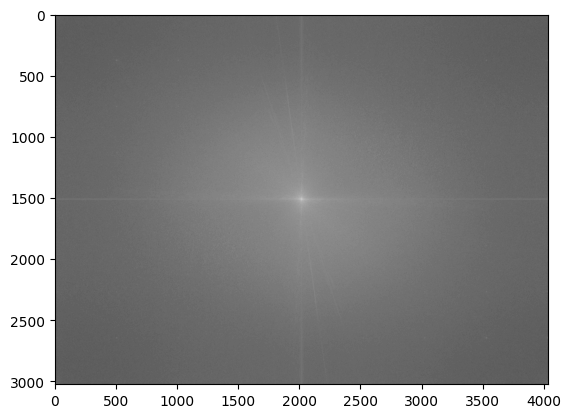

In [2]:
img = cv2.imread('data/IMG_1460.jpeg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))

plt.imshow(magnitude_spectrum, cmap = 'gray')

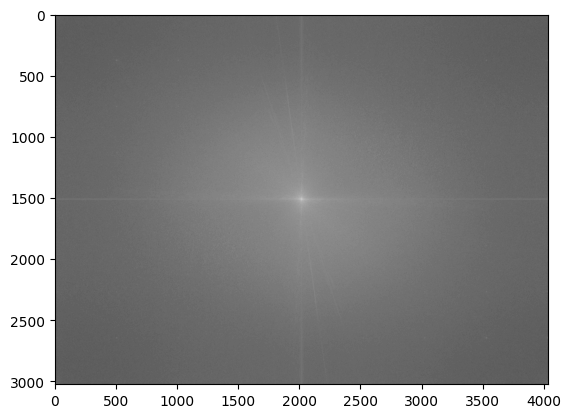

In [3]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
kr = 0 
kc = 0
fshift[crow-kr:crow+kr, ccol-kc:ccol+kc] = 0

plt.imshow(np.log(np.abs(fshift)), cmap = 'gray')

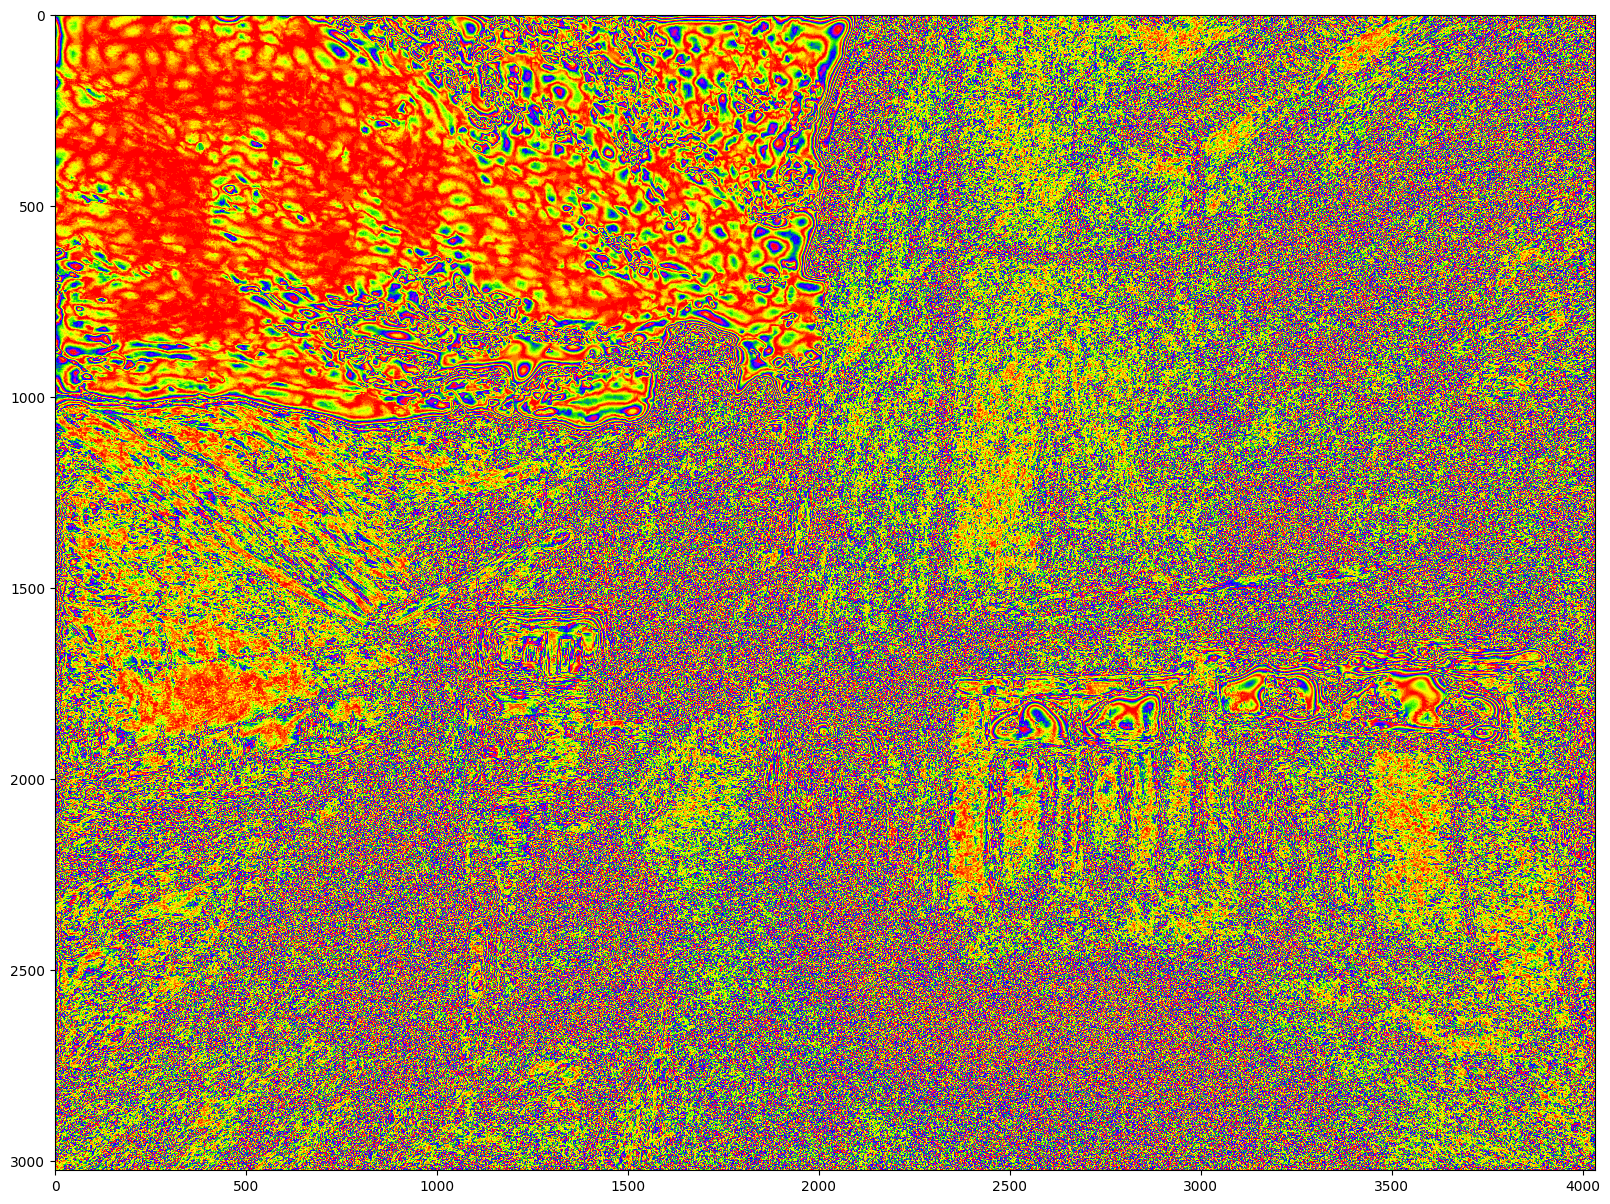

In [4]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
kr = 40
kc = 40
fshift[crow-kr:crow+kr, ccol-kc:ccol+kc] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(25,15))
plt.imshow(img_back, cmap = 'prism')

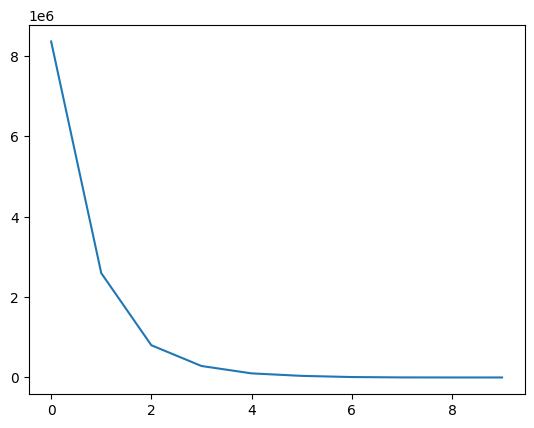

In [5]:
# Convert magnitude spectrum to image 
img = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

hist256 = cv2.calcHist([img_back], [0], None, [256], [0, 256])
hist10  = cv2.calcHist([img_back], [0], None, [10], [0, 256])

plt.plot(hist10)

In [ ]:
hist10_probs = hist10 / np.sum(hist10)
benford_probs = np.log10(1 + 1 / np.arange(1, 10))

In [ ]:
plt.plot(range(1,10), hist10_probs[1:10], 'x-')
plt.plot(range(1,10), benford_probs, 'o-')

# Set x ticks 
# plt.xticks(range(0,10))

In [11]:
def fourier_transform_hist(file, scl, pct=0.02):
    img = cv2.imread(file, 0)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift))
    
    rows, cols = img.shape
    crow,ccol = int(rows/2) , int(cols/2)
    kr = int(pct*rows)
    kc = int(pct*cols)
    fshift[crow-kr:crow+kr, ccol-kc:ccol+kc] = 0

    f_ishift = np.fft.ifftshift(fshift)
    fshift_img = np.log(np.abs(f_ishift))
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    mag_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    hist256 = cv2.calcHist([img_back], [0], None, [256], [0, 256])
    hist10  = cv2.calcHist([img_back], [0], None, [10], [0, 256])
    
    hist10_probs = hist10 / np.sum(hist10)
    benford_probs = np.log10(1 + 1 / np.arange(1, 10))
    
    return {"img": img, "mag": mag_spectrum, "shift": fshift_img, "xform": img_back, "hist10": hist10_probs, "ben": benford_probs}

/var/folders/lf/1tptfswn63qctnnn3ry60rj80000gn/T/ipykernel_1063/397700913.py:14: RuntimeWarning: divide by zero encountered in log
  fshift_img = np.log(np.abs(f_ishift))


(<Figure size 2000x300 with 5 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Magnitude Spectrum'}>,
        <AxesSubplot: title={'center': 'Mask'}>,
        <AxesSubplot: title={'center': 'Fourier Transform'}>,
        <AxesSubplot: title={'center': 'Histogram'}>], dtype=object))

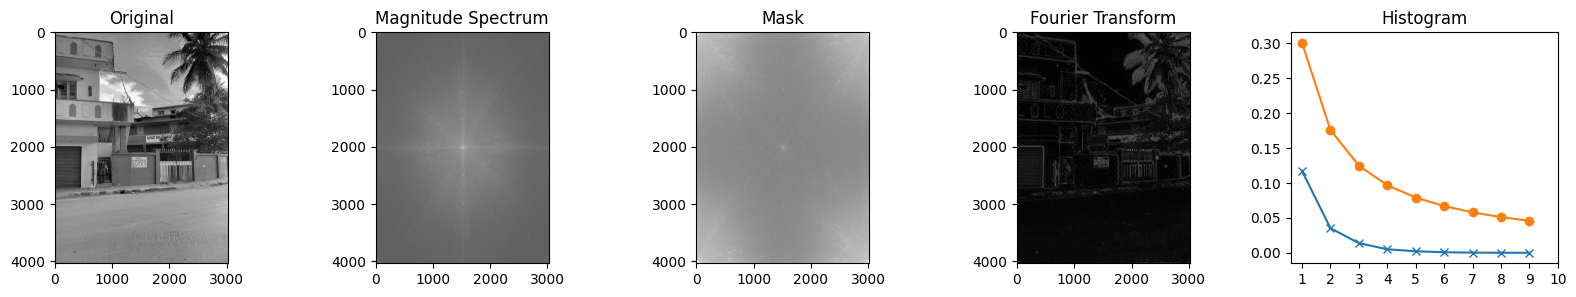

In [12]:
def plot_analysis(analysis):
    fig, ax = plt.subplots(1, 5, figsize=(20, 3), gridspec_kw={'width_ratios': [1, 1, 1, 1, 1]})
    ax[0].imshow(analysis['img'], cmap = 'gray')
    ax[0].set_title('Original')
    ax[1].imshow(analysis['mag'], cmap = 'gray')
    ax[1].set_title('Magnitude Spectrum')
    ax[2].imshow(analysis['shift'], cmap = 'gray')
    ax[2].set_title('Mask')
    ax[3].imshow(analysis['xform'], cmap = 'gray')
    ax[3].set_title('Fourier Transform')
    ax[4].plot(range(1,10), analysis['hist10'][1:10], 'x-')
    ax[4].plot(range(1,10), analysis['ben'], 'o-')
    ax[4].set_title('Benford\'s Law')
    ax[4].set_xticks(range(1,11))
    ax[4].set_title('Histogram')
    

    return fig, ax

plot_analysis(fourier_transform_hist('data/IMG_0331.jpeg', 0.5, 0.01))

In [ ]:
jpeg_files = [f for f in os.listdir('gaugan') if f.endswith('.jpeg') or f.endswith('.jpg')]
len(jpeg_files)

In [ ]:
# Plot analysis for 10 random images

fig, ax = plt.subplots(5, 3, figsize=(15, 15))

# Add padding between subplots
fig.subplots_adjust(hspace=0.5)

for i in range(5):
    analysis = fourier_transform_hist('gaugan/' + jpeg_files[i], 0.5, 0.1)
    ax[i, 0].imshow(analysis['img'], cmap = 'gray')
    ax[i, 0].set_title('Original')
    ax[i, 1].imshow(analysis['xform'], cmap = 'gray')
    ax[i, 1].set_title('Fourier Transform')
    ax[i, 2].plot(range(1,10), analysis['hist10'][1:10], 'x-')
    ax[i, 2].plot(range(1,10), analysis['ben'], 'o-')
    ax[i, 2].set_xticks(range(1,11))
    ax[i, 2].set_title('Histogram')

In [ ]:
# Generate a random image with random noise
img = np.random.randint(0, 255, (256, 256), dtype=np.uint8)

# Plot the image
plt.imshow(img, cmap = 'gray')

plt.imsave('random.jpg', img, cmap = 'gray')

In [ ]:
plot_analysis(fourier_transform_hist('random.jpg', 0.5, 0.01))

In [ ]:
plot_analysis(fourier_transform_hist('vinci.jpeg', 0.5, 0.01))

In [ ]:
plot_analysis(fourier_transform_hist('astro.jpeg', 0.5, 0.01))

In [ ]:
plot_analysis(fourier_transform_hist('wolf.jpeg', 0.5, 0.01))

In [ ]:
plot_analysis(fourier_transform_hist('abstract.jpg', 0.5, 0.01))

In [ ]:
plot_analysis(fourier_transform_hist('geometric.jpeg', 0.5, 0.01))

In [ ]:
plot_analysis(fourier_transform_hist('jeremy.jpg', 0.5, 0.01))

In [ ]:
plot_analysis(fourier_transform_hist('josh.jpg', 0.5, 0.01))

In [ ]:
plot_analysis(fourier_transform_hist('mike.jpg', 0.5, 0.01))

In [ ]:
def plot_analysis_logy(analysis):
    fig, ax = plt.subplots(1, 5, figsize=(20, 3), gridspec_kw={'width_ratios': [1, 1, 1, 1, 1]})
    ax[0].imshow(analysis['img'], cmap = 'gray')
    ax[0].set_title('Original')
    ax[1].imshow(analysis['mag'], cmap = 'gray')
    ax[1].set_title('Magnitude Spectrum')
    ax[2].imshow(analysis['shift'], cmap = 'gray')
    ax[2].set_title('Mask')
    ax[3].imshow(analysis['xform'], cmap = 'gray')
    ax[3].set_title('Fourier Transform')
    ax[4].plot(range(1,10), analysis['hist10'][1:10], 'x-')
    ax[4].plot(range(1,10), analysis['ben'], 'o-')
    ax[4].set_xticks(range(1,11))
    ax[4].set_title('Histogram')

    ax[4].set_yscale('log')

    return fig, ax


In [ ]:
plot_analysis_logy(fourier_transform_hist('mike.jpg', 0.5, 0.01))

In [ ]:
plot_analysis_logy(fourier_transform_hist('data/IMG_0026.jpeg', 0.5, 0.01))

/var/folders/lf/1tptfswn63qctnnn3ry60rj80000gn/T/ipykernel_1063/397700913.py:14: RuntimeWarning: divide by zero encountered in log
  fshift_img = np.log(np.abs(f_ishift))


16.149032407687713


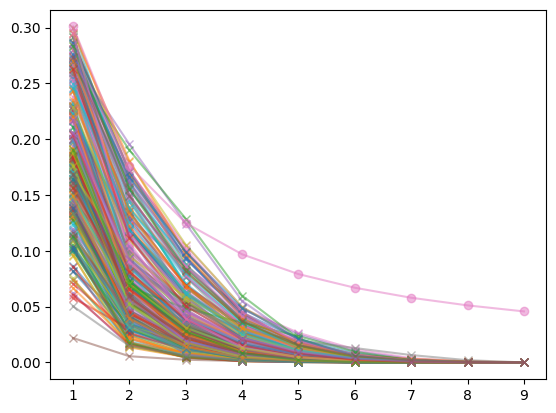

In [19]:
dir = 'data/'
jpeg_files = [f for f in os.listdir(dir) if f.endswith('.jpeg') or f.endswith('.jpg')]
len(jpeg_files)

variance = []

for img in jpeg_files:
    analysis = fourier_transform_hist(dir + img, 0.5, 0.01)
    plt.plot(range(1,10), analysis['hist10'][1:10], 'x-', alpha=0.5)
    diffs = np.abs(analysis['hist10'][1:10] - analysis['ben'])
    diffs2 = diffs * 2.0 
    variance.append(np.sum(diffs2))

plt.plot(range(1,10), analysis['ben'], 'o-', alpha=0.5)

print(np.average(variance))

/var/folders/lf/1tptfswn63qctnnn3ry60rj80000gn/T/ipykernel_1063/397700913.py:14: RuntimeWarning: divide by zero encountered in log
  fshift_img = np.log(np.abs(f_ishift))


16.62329528027092


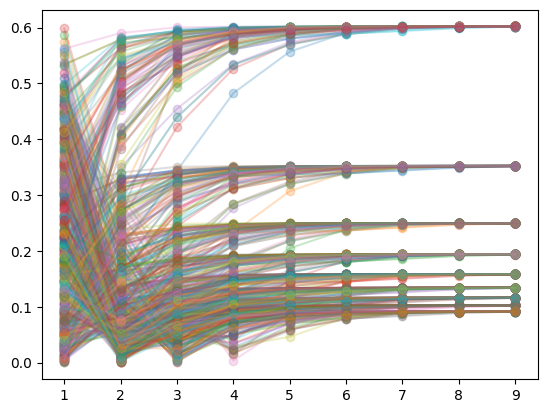

In [24]:
dir = 'scrap-images/gs/'
jpeg_files = [f for f in os.listdir(dir) if f.endswith('.jpeg') or f.endswith('.jpg')]
len(jpeg_files)

variance = []

for img in jpeg_files:
    analysis = fourier_transform_hist(dir + img, 0.5, 0.01)
    # plt.plot(range(1,10), analysis['hist10'][1:10], 'x-', alpha=0.5)
    diffs = np.abs(analysis['hist10'][1:10] - analysis['ben'])
    diffs2 = diffs * 2.0 
    plt.plot(range(1,10), diffs2, 'o-', alpha=0.25)
    variance.append(np.sum(diffs2))

# plt.plot(range(1,10), analysis['ben'], 'o-', alpha=0.5)

print(np.average(variance))


/var/folders/lf/1tptfswn63qctnnn3ry60rj80000gn/T/ipykernel_1063/397700913.py:14: RuntimeWarning: divide by zero encountered in log
  fshift_img = np.log(np.abs(f_ishift))


AttributeError: Line2D.set() got an unexpected keyword argument 'yscale'

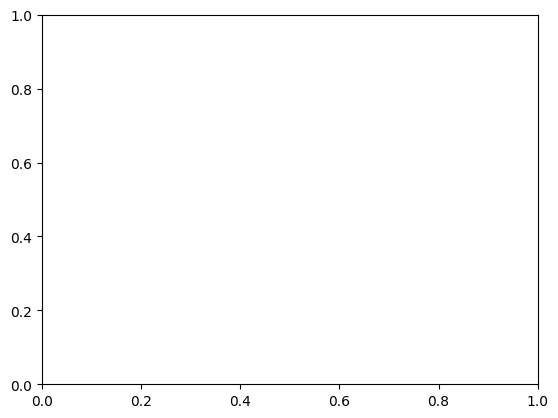

In [48]:
from matplotlib.pyplot import yscale


dir = 'gaugan/'
jpeg_files = [f for f in os.listdir(dir) if f.endswith('.jpeg') or f.endswith('.jpg')]
len(jpeg_files)

variance = []

for img in jpeg_files:
    analysis = fourier_transform_hist(dir + img, 0.5, 0.01)
    # plt.plot(range(1,10), analysis['hist10'][1:10], 'x-', alpha=0.5)
    diffs = np.abs(analysis['hist10'][1:10] - analysis['ben'])
    diffs = [(analysis['hist10'][i+1] - analysis['ben'][i]) for i in range(9)]
    diffs2 = [ diffs[i]** 2 for i in range(9)]
    plt.plot(range(1,10), diffs2, 'x-', alpha=0.5)
    variance.append(np.sum(diffs))

plt.plot(range(1,10), analysis['ben'], 'o-', alpha=0.5)

print(np.average(variance))

In [46]:
diffs2

[array([-0.22454533], dtype=float32),
 array([-0.15509897], dtype=float32),
 array([-0.1120832], dtype=float32),
 array([-0.08770134], dtype=float32),
 array([-0.0747562], dtype=float32),
 array([-0.06481819], dtype=float32),
 array([-0.05703446], dtype=float32),
 array([-0.05096942], dtype=float32),
 array([-0.0457346], dtype=float32),
 array([-0.22454533], dtype=float32),
 array([-0.15509897], dtype=float32),
 array([-0.1120832], dtype=float32),
 array([-0.08770134], dtype=float32),
 array([-0.0747562], dtype=float32),
 array([-0.06481819], dtype=float32),
 array([-0.05703446], dtype=float32),
 array([-0.05096942], dtype=float32),
 array([-0.0457346], dtype=float32)]

In [37]:
analysis['hist10'][1:10] - analysis['ben']

array([[-0.01495452,  0.10998421,  0.16113674,  0.18916546,  0.20689423,
         0.21912868,  0.22808353,  0.23492295,  0.24031798],
       [-0.12995072, -0.00501198,  0.04614054,  0.07416926,  0.09189803,
         0.10413249,  0.11308733,  0.11992676,  0.12532179],
       [-0.20720979, -0.08227105, -0.03111853, -0.00308981,  0.01463896,
         0.02687342,  0.03582826,  0.04266768,  0.04806272],
       [-0.2598236 , -0.13488487, -0.08373234, -0.05570362, -0.03797485,
        -0.0257404 , -0.01678555, -0.00994613, -0.0045511 ],
       [-0.28375697, -0.15881823, -0.10766571, -0.07963699, -0.06190822,
        -0.04967376, -0.04071892, -0.0338795 , -0.02848446],
       [-0.29526945, -0.17033071, -0.11917819, -0.09114947, -0.0734207 ,
        -0.06118624, -0.0522314 , -0.04539198, -0.03999694],
       [-0.29962211, -0.17468338, -0.12353085, -0.09550213, -0.07777336,
        -0.06553891, -0.05658406, -0.04974464, -0.04434961],
       [-0.30082578, -0.17588704, -0.12473452, -0.09670579, -0

In [21]:
diffs 

array([[0.08685   , 0.03808873, 0.08924126, 0.11726998, 0.13499875,
        0.1472332 , 0.15618805, 0.16302747, 0.1684225 ],
       [0.22976764, 0.1048289 , 0.05367638, 0.02564765, 0.00791889,
        0.00431557, 0.01327041, 0.02010984, 0.02550487],
       [0.26305468, 0.13811595, 0.08696343, 0.0589347 , 0.04120593,
        0.02897148, 0.02001664, 0.01317721, 0.00778218],
       [0.28508075, 0.16014201, 0.10898949, 0.08096076, 0.063232  ,
        0.05099754, 0.0420427 , 0.03520327, 0.02980824],
       [0.29442675, 0.16948802, 0.1183355 , 0.09030677, 0.07257801,
        0.06034355, 0.05138871, 0.04454928, 0.03915425],
       [0.29849322, 0.17355449, 0.12240196, 0.09437324, 0.07664447,
        0.06441002, 0.05545517, 0.04861575, 0.04322072],
       [0.2995766 , 0.17463786, 0.12348534, 0.09545661, 0.07772785,
        0.06549339, 0.05653855, 0.04969912, 0.04430409],
       [0.29977877, 0.17484004, 0.12368752, 0.09565879, 0.07793003,
        0.06569557, 0.05674073, 0.0499013 , 0.04450627],


/var/folders/lf/1tptfswn63qctnnn3ry60rj80000gn/T/ipykernel_1063/397700913.py:14: RuntimeWarning: divide by zero encountered in log
  fshift_img = np.log(np.abs(f_ishift))


KeyboardInterrupt: 

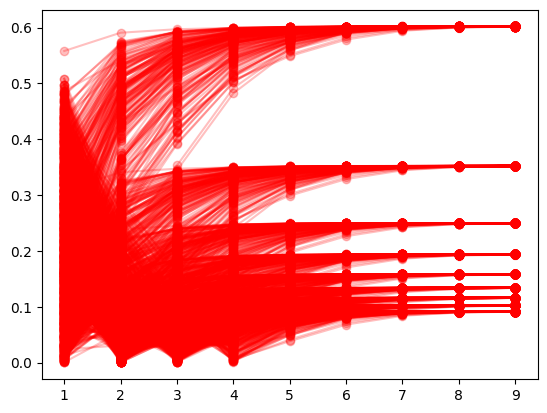

In [34]:
dir = 'data/'
jpeg_files = [f for f in os.listdir(dir) if f.endswith('.jpeg') or f.endswith('.jpg')]
len(jpeg_files)

variance = []

for img in jpeg_files:
    analysis = fourier_transform_hist(dir + img, 0.5, 0.01)
    # plt.plot(range(1,10), analysis['hist10'][1:10], 'x-', alpha=0.5)
    diffs = np.abs(analysis['hist10'][1:10] - analysis['ben'])
    diffs2 = diffs * 2.0 
    plt.plot(range(1,10), diffs2, 'o-', alpha=0.25, color='red')
    
    variance.append(np.sum(diffs2))



# plt.plot(range(1,10), analysis['ben'], 'o-', alpha=0.5)

print(np.average(variance))


In [35]:
diffs2

array([[0.02990905, 0.21996843, 0.32227347, 0.37833092, 0.41378845,
        0.43825737, 0.45616705, 0.4698459 , 0.48063596],
       [0.25990144, 0.01002396, 0.09228108, 0.14833853, 0.18379606,
        0.20826498, 0.22617466, 0.23985351, 0.25064357],
       [0.41441958, 0.1645421 , 0.06223706, 0.00617961, 0.02927792,
        0.05374683, 0.07165652, 0.08533537, 0.09612543],
       [0.5196472 , 0.26976973, 0.16746469, 0.11140724, 0.07594971,
        0.05148079, 0.03357111, 0.01989226, 0.00910219],
       [0.56751394, 0.31763647, 0.21533142, 0.15927397, 0.12381644,
        0.09934753, 0.08143784, 0.06775899, 0.05696893],
       [0.5905389 , 0.34066143, 0.23835638, 0.18229893, 0.1468414 ,
        0.12237249, 0.1044628 , 0.09078395, 0.07999389],
       [0.59924422, 0.34936675, 0.24706171, 0.19100426, 0.15554672,
        0.13107781, 0.11316813, 0.09948928, 0.08869921],
       [0.60165155, 0.35177408, 0.24946903, 0.19341159, 0.15795405,
        0.13348514, 0.11557546, 0.10189661, 0.09110654],


/var/folders/lf/1tptfswn63qctnnn3ry60rj80000gn/T/ipykernel_1063/397700913.py:14: RuntimeWarning: divide by zero encountered in log
  fshift_img = np.log(np.abs(f_ishift))


16.54693619609902


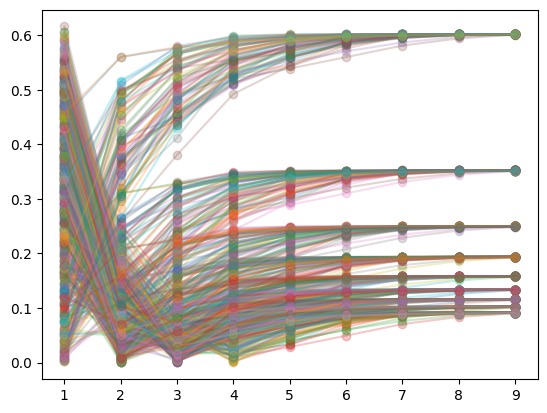

In [26]:
dir = 'gaugan/'
jpeg_files = [f for f in os.listdir(dir) if f.endswith('.jpeg') or f.endswith('.jpg')]
len(jpeg_files)

variance = []

for img in jpeg_files:
    analysis = fourier_transform_hist(dir + img, 0.5, 0.01)
    # plt.plot(range(1,10), analysis['hist10'][1:10], 'x-', alpha=0.5)
    diffs = np.abs(analysis['hist10'][1:10] - analysis['ben'])
    diffs2 = diffs * 2.0 
    plt.plot(range(1,10), diffs2, 'o-', alpha=0.25)
    variance.append(np.sum(diffs2))

# plt.plot(range(1,10), analysis['ben'], 'o-', alpha=0.5)

print(np.average(variance))


(<Figure size 2000x300 with 5 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Magnitude Spectrum'}>,
        <AxesSubplot: title={'center': 'Mask'}>,
        <AxesSubplot: title={'center': 'Fourier Transform'}>,
        <AxesSubplot: title={'center': 'Histogram'}>], dtype=object))

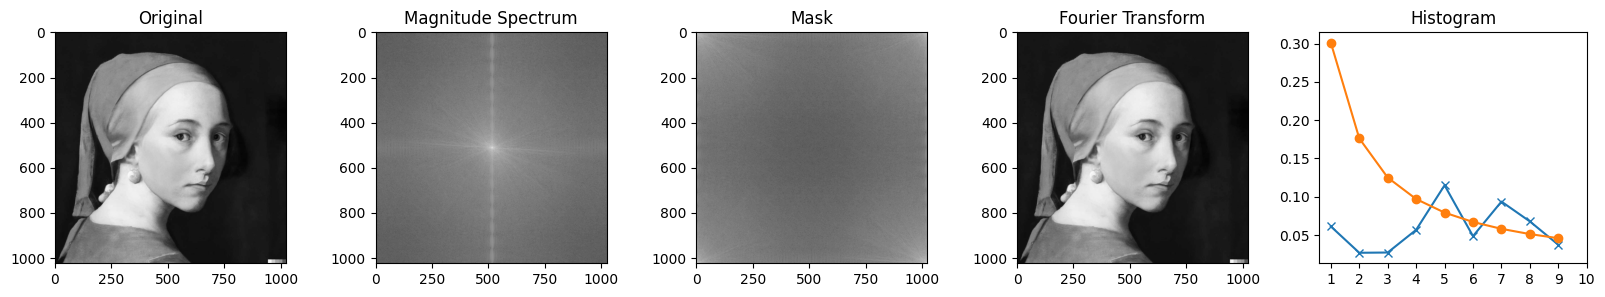

In [52]:
plot_analysis(fourier_transform_hist('vinci.jpeg', 0.5, 0.0001))

(<Figure size 2000x300 with 5 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Magnitude Spectrum'}>,
        <AxesSubplot: title={'center': 'Mask'}>,
        <AxesSubplot: title={'center': 'Fourier Transform'}>,
        <AxesSubplot: title={'center': 'Histogram'}>], dtype=object))

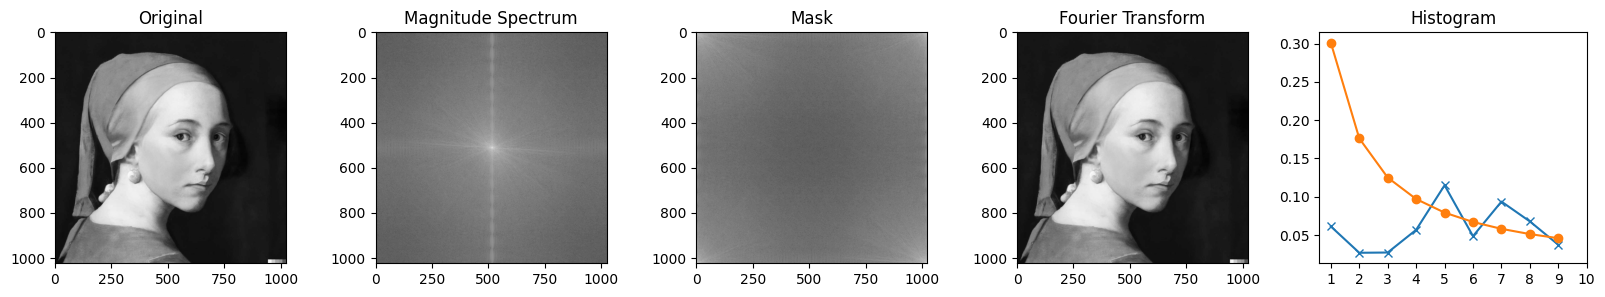

In [56]:
plot_analysis(fourier_transform_hist('vinci.jpeg', 0.5, 0.0005))

/var/folders/lf/1tptfswn63qctnnn3ry60rj80000gn/T/ipykernel_1063/397700913.py:14: RuntimeWarning: divide by zero encountered in log
  fshift_img = np.log(np.abs(f_ishift))


(<Figure size 2000x300 with 5 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Magnitude Spectrum'}>,
        <AxesSubplot: title={'center': 'Mask'}>,
        <AxesSubplot: title={'center': 'Fourier Transform'}>,
        <AxesSubplot: title={'center': 'Histogram'}>], dtype=object))

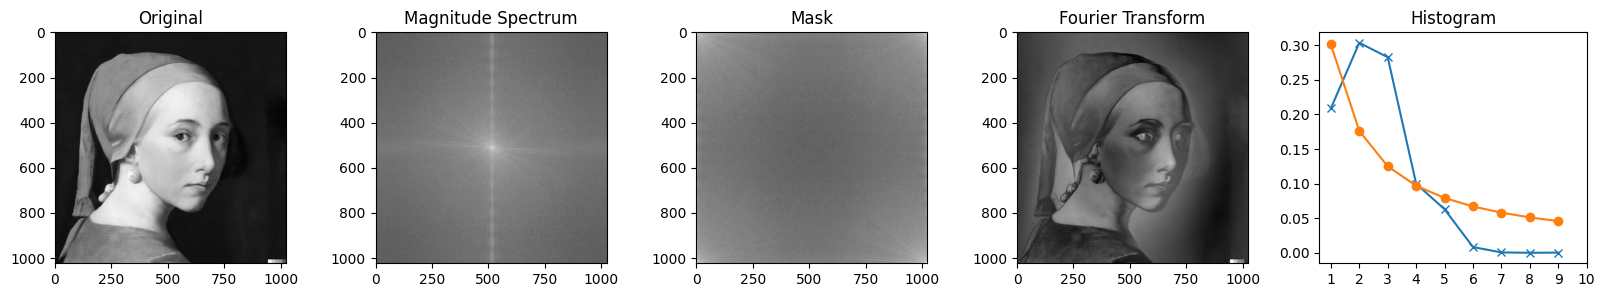

In [57]:
plot_analysis(fourier_transform_hist('vinci.jpeg', 0.5, 0.001))

/var/folders/lf/1tptfswn63qctnnn3ry60rj80000gn/T/ipykernel_1063/397700913.py:14: RuntimeWarning: divide by zero encountered in log
  fshift_img = np.log(np.abs(f_ishift))


(<Figure size 2000x300 with 5 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Magnitude Spectrum'}>,
        <AxesSubplot: title={'center': 'Mask'}>,
        <AxesSubplot: title={'center': 'Fourier Transform'}>,
        <AxesSubplot: title={'center': 'Histogram'}>], dtype=object))

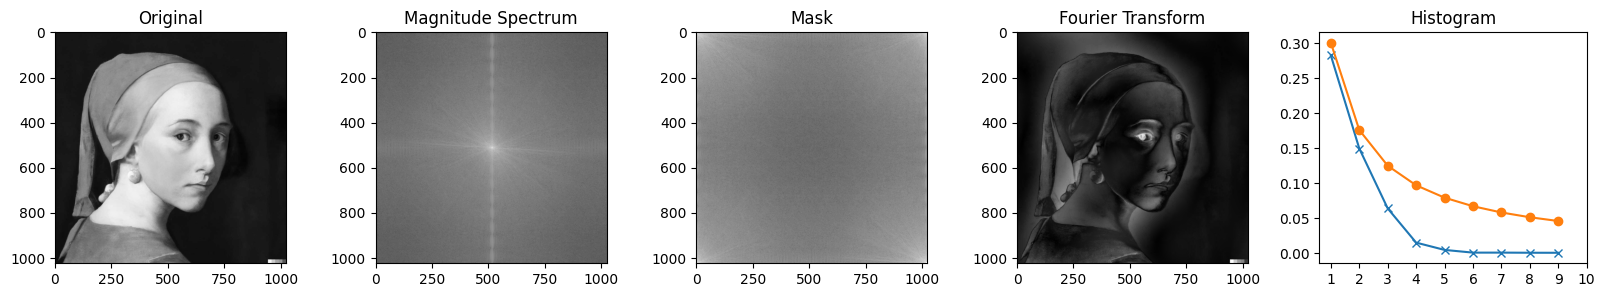

In [58]:
plot_analysis(fourier_transform_hist('vinci.jpeg', 0.5, 0.002))

/var/folders/lf/1tptfswn63qctnnn3ry60rj80000gn/T/ipykernel_1063/397700913.py:14: RuntimeWarning: divide by zero encountered in log
  fshift_img = np.log(np.abs(f_ishift))


(<Figure size 2000x300 with 5 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Magnitude Spectrum'}>,
        <AxesSubplot: title={'center': 'Mask'}>,
        <AxesSubplot: title={'center': 'Fourier Transform'}>,
        <AxesSubplot: title={'center': 'Histogram'}>], dtype=object))

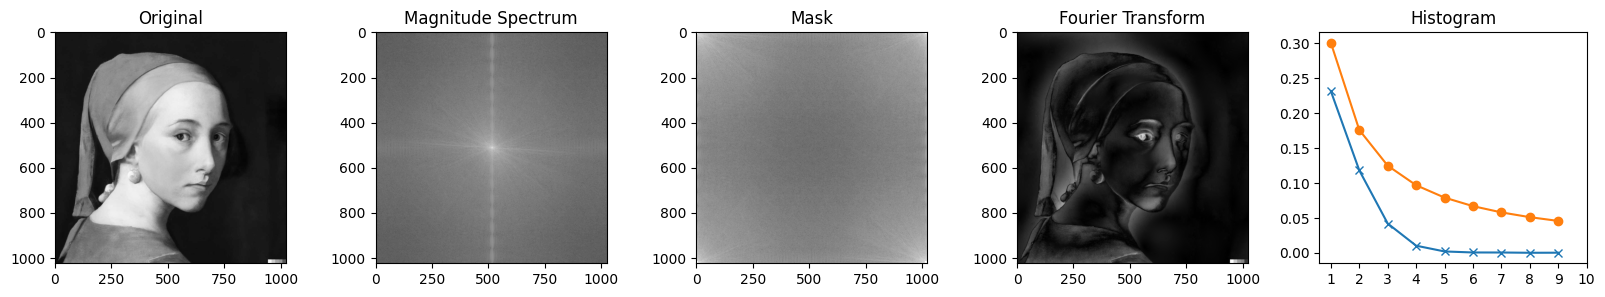

In [59]:
plot_analysis(fourier_transform_hist('vinci.jpeg', 0.5, 0.003))

/var/folders/lf/1tptfswn63qctnnn3ry60rj80000gn/T/ipykernel_1063/397700913.py:14: RuntimeWarning: divide by zero encountered in log
  fshift_img = np.log(np.abs(f_ishift))


(<Figure size 2000x300 with 5 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Magnitude Spectrum'}>,
        <AxesSubplot: title={'center': 'Mask'}>,
        <AxesSubplot: title={'center': 'Fourier Transform'}>,
        <AxesSubplot: title={'center': 'Histogram'}>], dtype=object))

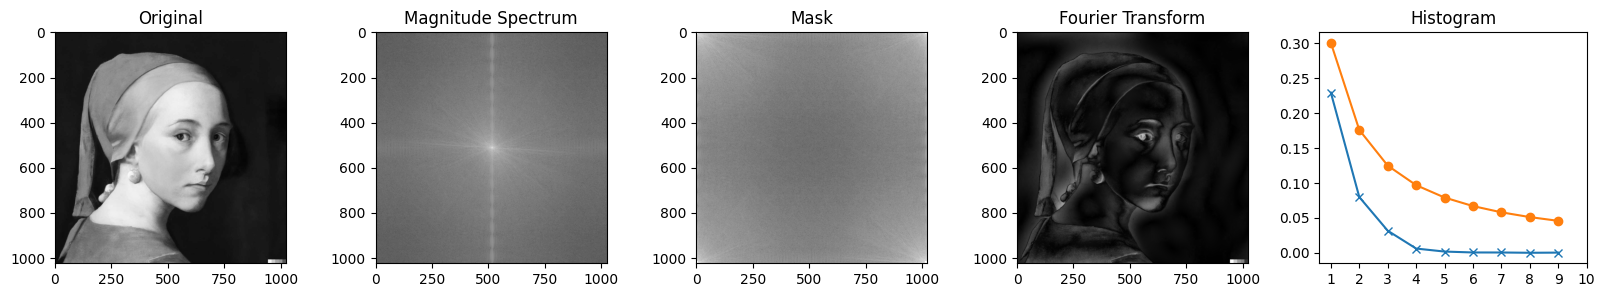

In [60]:
plot_analysis(fourier_transform_hist('vinci.jpeg', 0.5, 0.004))

/var/folders/lf/1tptfswn63qctnnn3ry60rj80000gn/T/ipykernel_1063/397700913.py:14: RuntimeWarning: divide by zero encountered in log
  fshift_img = np.log(np.abs(f_ishift))


(<Figure size 2000x300 with 5 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Magnitude Spectrum'}>,
        <AxesSubplot: title={'center': 'Mask'}>,
        <AxesSubplot: title={'center': 'Fourier Transform'}>,
        <AxesSubplot: title={'center': 'Histogram'}>], dtype=object))

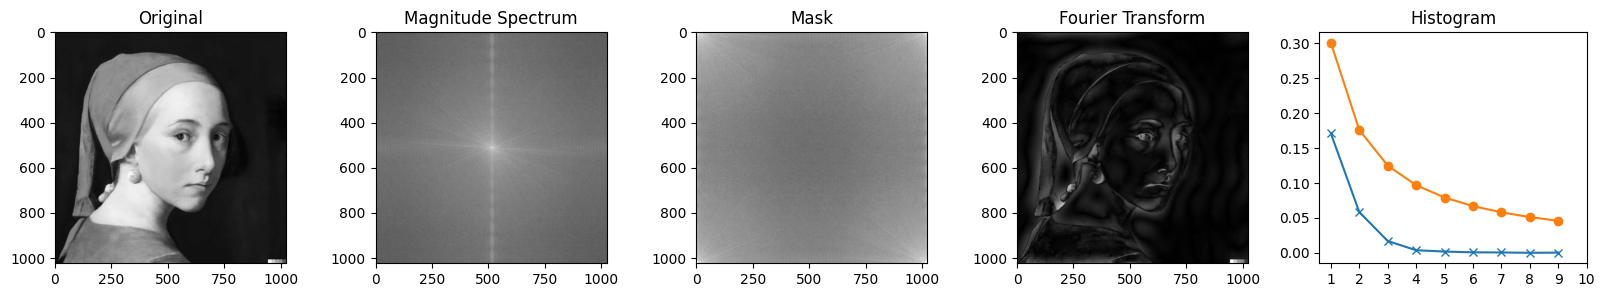

In [61]:
plot_analysis(fourier_transform_hist('vinci.jpeg', 0.5, 0.006))

/var/folders/lf/1tptfswn63qctnnn3ry60rj80000gn/T/ipykernel_1063/397700913.py:14: RuntimeWarning: divide by zero encountered in log
  fshift_img = np.log(np.abs(f_ishift))


(<Figure size 2000x300 with 5 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Magnitude Spectrum'}>,
        <AxesSubplot: title={'center': 'Mask'}>,
        <AxesSubplot: title={'center': 'Fourier Transform'}>,
        <AxesSubplot: title={'center': 'Histogram'}>], dtype=object))

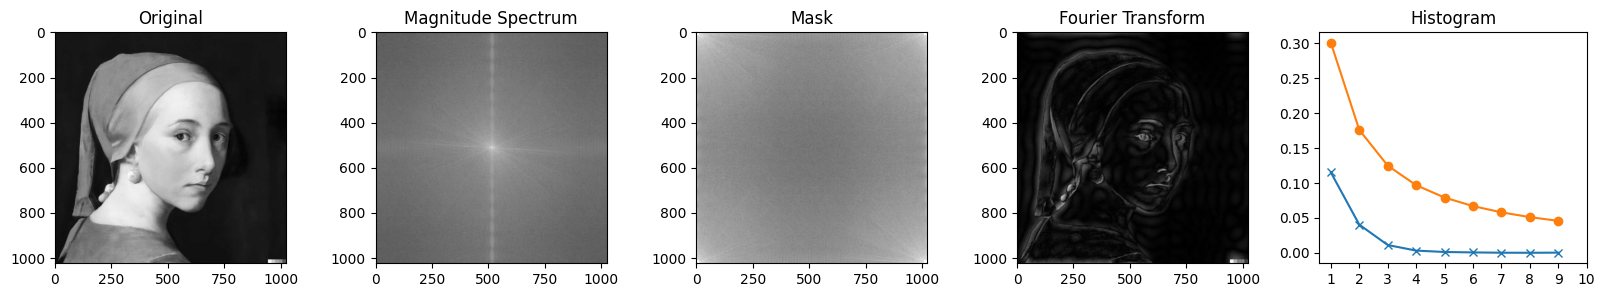

In [62]:
plot_analysis(fourier_transform_hist('vinci.jpeg', 0.5, 0.01))

/var/folders/lf/1tptfswn63qctnnn3ry60rj80000gn/T/ipykernel_1063/397700913.py:14: RuntimeWarning: divide by zero encountered in log
  fshift_img = np.log(np.abs(f_ishift))


(<Figure size 2000x300 with 5 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Magnitude Spectrum'}>,
        <AxesSubplot: title={'center': 'Mask'}>,
        <AxesSubplot: title={'center': 'Fourier Transform'}>,
        <AxesSubplot: title={'center': 'Histogram'}>], dtype=object))

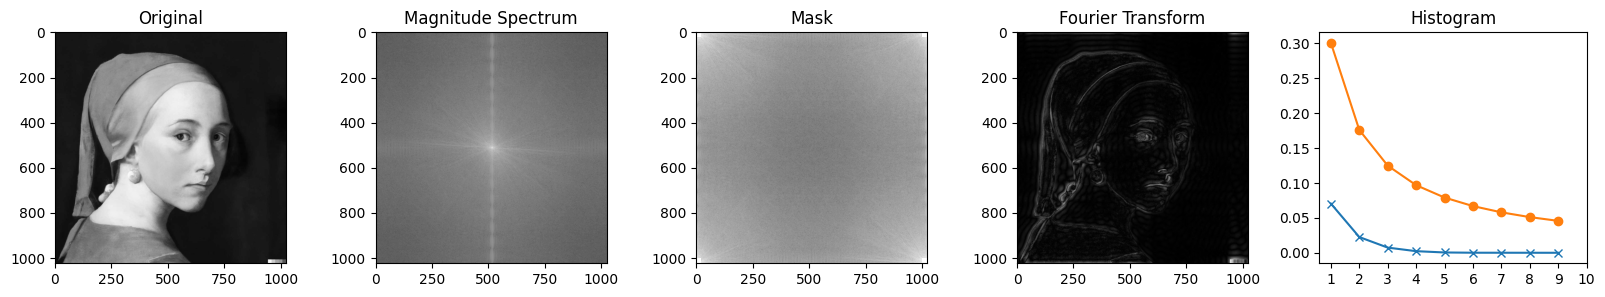

In [63]:
plot_analysis(fourier_transform_hist('vinci.jpeg', 0.5, 0.02))